<a href="https://colab.research.google.com/github/muskanvarmaa/Internboot/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [ ]:
f = df.sort_values(['store_nbr', 'date'])
df['lag_7'] = df.groupby('store_nbr')['sales'].shift(7)
df['lag_30'] = df.groupby('store_nbr')['sales'].shift(30)

In [ ]:
df = df.dropna()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


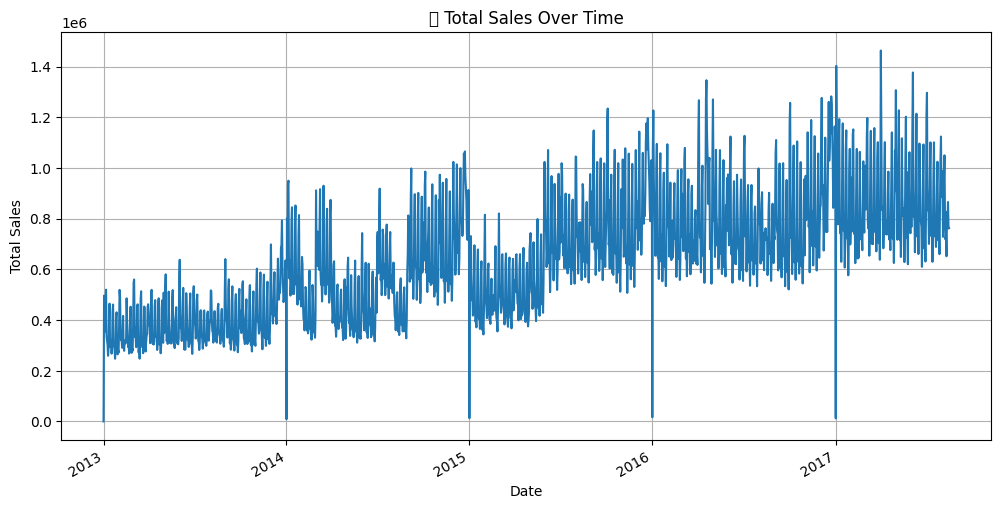

In [ ]:
plt.figure(figsize=(12,6))
df.groupby('date')['sales'].sum().plot()
plt.title('📈 Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


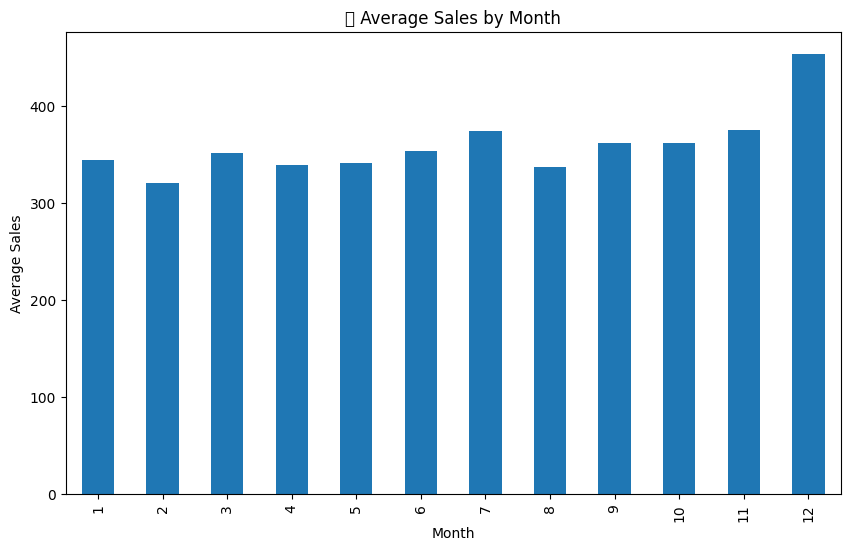

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('month')['sales'].mean().plot(kind='bar')
plt.title('🗓️ Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


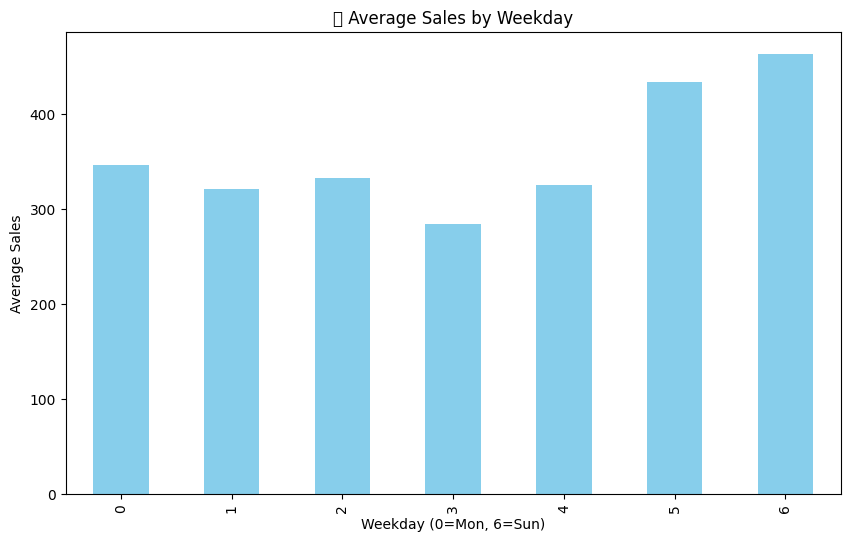

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('weekday')['sales'].mean().plot(kind='bar', color='skyblue')
plt.title('📅 Average Sales by Weekday')
plt.xlabel('Weekday (0=Mon, 6=Sun)')
plt.ylabel('Average Sales')
plt.show()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


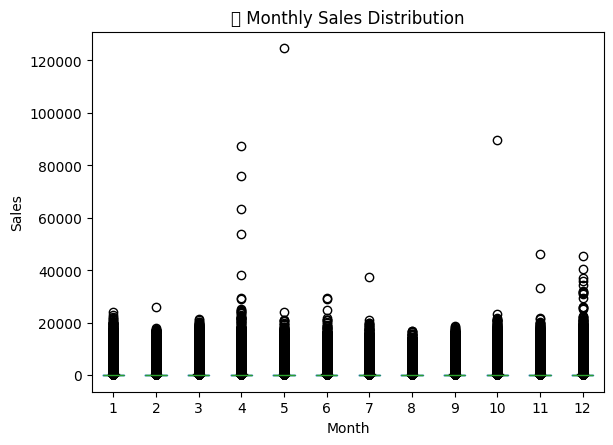

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(column='sales', by='month', grid=False)
plt.title('📊 Monthly Sales Distribution')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
X = df[['year', 'month', 'day', 'weekday', 'is_weekend', 'lag_7', 'lag_30']]
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
ridge_cv = RidgeCV(alphas=[0.1, 1, 10, 100])
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1], cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)


In [ ]:
print("✅ Best alpha for Ridge:", ridge_cv.alpha_)
print("✅ Best alpha for Lasso:", lasso_cv.alpha_)


✅ Best alpha for Ridge: 100.0
✅ Best alpha for Lasso: 0.001


In [ ]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {name} Model")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")


In [ ]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


📌 Linear Regression Model
MSE: 1207484.93
RMSE: 1098.86
MAE: 512.31
R² Score: 0.0125

📌 Ridge Regression Model
MSE: 1207484.95
RMSE: 1098.86
MAE: 512.31
R² Score: 0.0125

📌 Lasso Regression Model
MSE: 1207484.94
RMSE: 1098.86
MAE: 512.31
R² Score: 0.0125


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_
})
print("\n📊 Feature Coefficients:\n", coef_df)



📊 Feature Coefficients:
       Feature     Linear      Ridge      Lasso
0        year  99.876278  99.871459  99.874914
1       month  37.409291  37.406999  37.408072
2         day -12.856261 -12.855730 -12.855243
3     weekday -14.188676 -14.180807 -14.183800
4  is_weekend  70.128743  70.119489  70.123809
5       lag_7 -20.038220 -20.036710 -20.036973
6      lag_30 -47.435492 -47.432843 -47.434206


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


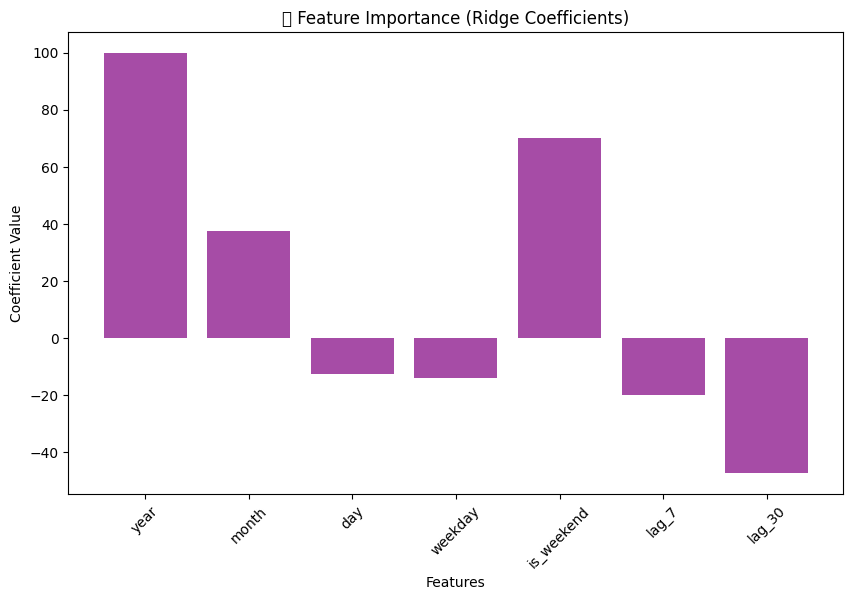

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(coef_df['Feature'], coef_df['Ridge'], color='purple', alpha=0.7)
plt.title('🏋️ Feature Importance (Ridge Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


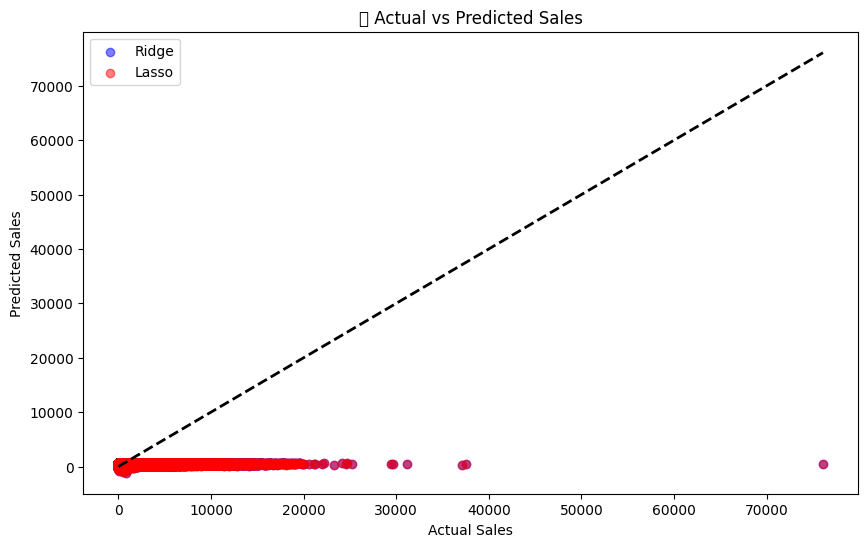

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5, label='Ridge')
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.5, label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('📊 Actual vs Predicted Sales')
plt.legend()
plt.show()

In [ ]:
df.to_csv('/content/task3.csv', index=False)
print("✅ File saved as task3.csv")


✅ File saved as task3.csv
